In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as linalg
import math
import time

# Parameters
d = 0 #0.35 #squid asymmetry
g = 1 #0.08 #transmon cavity coupling
Wq0 = 3.474 #dressed qubit frequency
Wc0 = 7.192 #dressed cavity frequency
lamb_shift  = g**2/(Wc0 - Wq0)
Wc = Wc0 - lamb_shift #bare qubit
Wq = Wq0 + lamb_shift #bare cavity


gamma_L = 0.1 # chain coupling to the left josephson junction
gamma_R = gamma_L*(1-d)/(1+d) # chain coupling to the right josephson junction
t = 0.1 # chain hopping
E_C = 1 # charging energy
E_J_max = 5 #(Wq+E_C)**2/8/E_C
# E_J1 = 1
# E_J2 = E_J1
n_g = 0
N = 2 # number of chain fermions
n_0 = 10 #number of CP
steps = 200
flux_0 = 2.067833*10**(-15)
flux_array = np.linspace(-flux_0,flux_0,steps)
num_of_eigen = 4
max_num_photons = 6 #number of photons

n_g_array = np.linspace(-2, 2, steps)
m_array = 1
epsilon_m = (-1)**m_array*E_C*2**(4*m_array+5)/np.math.factorial(m_array)*np.sqrt(E_J_max/(2*E_C))**(m_array/2 + 3/4)*np.exp(-np.sqrt(8*E_J_max/E_C)) #disspersion


# Defining the single spin operators s_x, s_y, s_z:
s_x = 0.5*np.array([[0,1],[1,0]], dtype=complex)
s_y = 0.5*np.array([[0,-1j],[1j,0]], dtype=complex)
s_z = 0.5*np.array([[1,0],[0,-1]], dtype=complex)

s_plus = s_x + 1j*s_y
s_minus = s_x - 1j*s_y

# Defining the creation and annihilation operators for the SCs
exp_phi_plus = np.diag(np.ones(2*n_0, dtype=complex), k=-1) # Creation
exp_phi_minus = np.diag(np.ones(2*n_0, dtype=complex), k=1)# Annihilation

# harmonic osc creation and annihilation
occupation = np.arange(1,max_num_photons+1, dtype=complex)
a_down = np.diag(np.sqrt(occupation), k=1)
a_up = np.diag(np.sqrt(occupation), k=-1)
occupation_operator = a_up @ a_down


In [ ]:

def H_T2(E_C = E_C, n_0 = n_0, n_g = n_g, E_J_max = E_J_max, d = d, flux=0): # The hamiltonian of the transmon alone. n0 is the number of cp passed from one sc to the other
    D = np.zeros(2*n_0+1) #this will be the diagonal
    for i in range(2*n_0+1):
        D[i] = 4*E_C*(-n_0+i-n_g)**2
    H = np.zeros((2*n_0+1,2*n_0+1))
    H = H + np.diag(D) - (E_J_max/2)*(exp_phi_minus + exp_phi_plus)
    return H

def H_cavity(Wc = Wc):
    H = Wc*occupation_operator
    B = np.sum(np.abs(H-np.conj(H.T)))
    print("hermitian of H_cav:", B)
    return H

def H_int_transmon_cavity(g = g, n_0 = n_0, n_g = n_g): # also added the chain's dimension
    # U is the eigenvector matrix of the transmon
    D = np.zeros(2*n_0+1) #this will be the diagonal
    for i in range(2*n_0+1):
        D[i] = (-n_0+i-n_g)
    D = np.diag(D)
    H = g*np.kron(D,(a_down+a_up))
    B = np.sum(np.abs(H-np.conj(H.T)))
    print("hermitian of H_int_trans_cav:", B)
    return H

def H_total(n_g=n_g, E_C = E_C, n_0 = n_0, E_J_max = E_J_max, d = d, flux=0):
    H=np.kron(H_T2(n_g=n_g), np.identity((max_num_photons+1),dtype=complex)) + np.kron(np.identity((2*n_0+1),dtype=complex), H_cavity()) + H_int_transmon_cavity(n_g=n_g)
    return H

In [2]:

eigenvalues_n_g = np.zeros((steps,(2*n_0+1)*(max_num_photons+1)), dtype=complex) # we have num of rows in the size of steps and columns in the size of (2*n_0+1)*(2**N). each row contains all the eigenvalues for specific flux, so each column is a specific eigenvalue for diff fluxes.
eigenvectors_n_g = np.zeros((steps,(2*n_0+1)*(max_num_photons+1),(2*n_0+1)*(max_num_photons+1)), dtype=complex)# first dim is steps of flux, 2nd and 3rd dims are for the eigenvectors. so if numpy returns the eigenvectors as a matrix where each column corresponds to eigen-energy, dim 2 is the rows of the matrix and dim 3 is the columns.

for i in range(n_g_array.shape):
    H = H_total(n_g = n_g_array[i])
    current_eigenvalues, current_eigenvectors = np.linalg.eigh(H)
    print(i)
    # store results
    eigenvalues_n_g[i,:] = current_eigenvalues # the difference from the GS
    eigenvectors_n_g[i,:,:] = current_eigenvectors


# toc = time.time()
# print(f"time {toc - tic}s")


hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
0
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
1
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
2
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
3
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
4
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
5
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
6
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
7
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
8
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
9
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
10
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
11
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
12
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
13
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
14
hermitian of H_cav: 0.0
hermitian of H_int_trans_cav: 0.0
15
hermitian of H_cav: 0.0
hermitian 

Plot of the differences from the GS


In [3]:
amount_of_energies_n_g = eigenvalues_n_g.shape[1]
amount_of_energy_diff = np.sum(list(range(amount_of_energies_n_g)))
def energy_diff():
    delta_energy_n_g = np.zeros((steps,amount_of_energies_n_g,amount_of_energies_n_g), dtype=complex) # contains the energy differences, 0 axies in the size of n_g array, 1 axies and 2 axies in size of amount of energies. so in each [:,i,j] i will the diff E_i-E_j
    for i in range(amount_of_energies_n_g): # a loop that iterates from 0 to 6 including
        print("i =", i)
        for j in range(i+1, amount_of_energies_n_g): # a loop that iterates from 0 to 6 including
            diff = eigenvalues_n_g[:,i] - eigenvalues_n_g[:,j] # should be an array with number of rows as "steps" (and flux_array) and one column
            delta_energy_n_g[:,i,j] = diff
    delta_energy_temp_n_g = np.zeros((steps,amount_of_energy_diff))
    upper_triangle_indices = np.triu_indices(delta_energy_n_g.shape[1],k=1)
    for i in range(steps):
        delta_energy_temp_n_g[i,:] = delta_energy_n_g[i][upper_triangle_indices]
    return delta_energy_temp_n_g

delta_energy_n_g = energy_diff()

i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99
i = 100
i = 101
i = 102
i = 103
i = 104
i = 105
i = 106
i = 107
i = 108
i = 109
i = 110
i = 111
i = 112
i = 113
i = 114
i = 115
i = 116
i = 117
i = 118
i = 119
i = 120
i = 121
i = 122
i = 123
i = 124
i = 125
i = 126
i = 127
i = 128
i = 129
i = 130
i = 131
i = 132
i = 133
i = 134
i = 135
i = 136
i = 137
i = 13

C:\Users\User\AppData\Local\Temp\ipykernel_26676\3439034837.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  delta_energy_temp_n_g[i,:] = delta_energy_n_g[i][upper_triangle_indices]


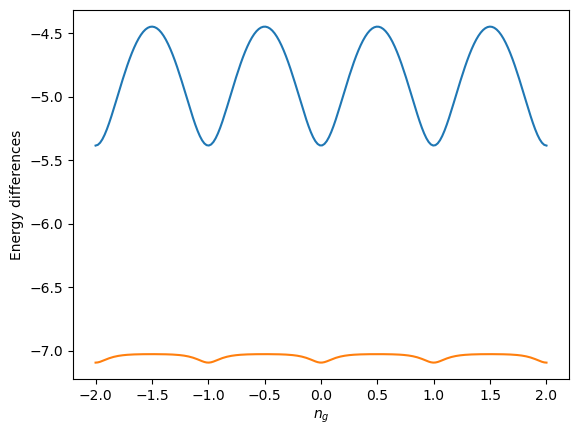

C:\Users\User\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


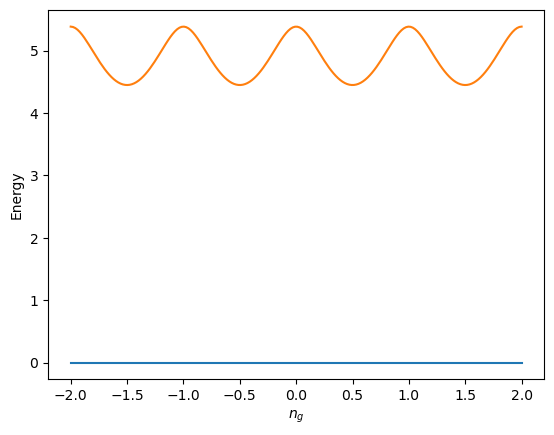

In [4]:
def plot_energy_diff_vs_n_g(amount=amount_of_energies_n_g):
    for i in range(amount):
        plt.plot(n_g_array,delta_energy_n_g[:,i])
    plt.xlabel(r'${n_g}$')
    plt.ylabel('Energy differences')
    # plt.title('Energy differences from GS (asymmetric transmon, cavity and chain)')

    # Save the figure as an image (e.g., PNG)
    filename = f'diff_n_g_amount_of_energies_diff_{amount}_CPnum_{n_0}_PhotonsNum_{max_num_photons}_chainNum_{N}_t_{t}.png'
    plt.savefig(filename)
    plt.show()

def plot_energy_vs_n_g(amount):
    for i in range(amount):
        plt.plot(n_g_array,eigenvalues_n_g[:,i]-eigenvalues_n_g[:,0])
    plt.xlabel(r'${n_g}$')
    plt.ylabel('Energy')
    # plt.title('Energy differences from GS (asymmetric transmon, cavity and chain)')

    # Save the figure as an image (e.g., PNG)
    filename = f'n_g_amount_of_energies_{amount}_CPnum_{n_0}_PhotonsNum_{max_num_photons}_chainNum_{N}_t_{t}_Transmon_.png'
    plt.savefig(filename)
    plt.show()

plot_energy_diff_vs_n_g(2)
plot_energy_vs_n_g(2)

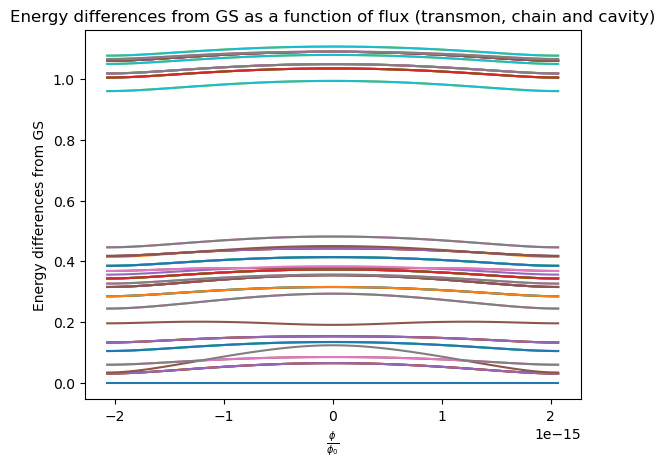

[[[ 2.29391805e-17-1.04413590e-16j  1.23111416e-17+1.76259050e-18j
   -4.20613607e-17-3.44979619e-16j ... -3.43254985e-34-1.31670745e-33j
   -4.23922323e-45-2.04345894e-45j  1.97285632e-16-7.94746968e-28j]
  [-2.43837762e-17+1.10195398e-16j -6.79776097e-17-1.83126666e-17j
    1.49888162e-17+1.01293434e-16j ...  2.01040974e-33+7.74808216e-33j
    1.06565939e-44+9.33839719e-45j  3.68799855e-16-2.72808406e-28j]
  [ 1.33573509e-16-6.03891845e-16j -1.58082635e-17-2.86859826e-18j
    1.84230008e-17+2.95137083e-16j ... -1.66329737e-33-6.62311811e-33j
   -2.13323598e-44-3.50895822e-45j  2.24895487e-16+2.82060742e-28j]
  ...
  [ 5.97474532e-18+1.85712654e-18j -1.06965049e-17-9.92575790e-18j
    1.84811409e-18+5.47185632e-19j ... -3.30603014e-22+1.40842289e-21j
   -1.08136706e-22-1.04284845e-21j -0.00000000e+00+0.00000000e+00j]
  [ 4.92474826e-17+1.52787943e-17j -2.73506152e-17-7.39571885e-17j
    1.45323824e-17+2.43030222e-18j ...  2.62254430e-23-1.10875282e-22j
    8.73532022e-24+8.15713305e-2

In [9]:
energies = 70
for i in range(energies):
    plt.plot(flux_array,np.real(eigenvalues_diff2[:,i]))

plt.xlabel(r'$\frac{\phi}{\phi_0}$')
plt.ylabel('Energy differences from GS')
plt.title('Energy differences from GS as a function of flux (transmon, chain and cavity)')

# Save the figure as an image (e.g., PNG)
filename = f'graph_of_energy_diff_from_GS_for_transmon+chain+cavity_{energies}_energies_new.png'
plt.savefig(filename)

# plt.legend()
plt.show()
print(eigenvectors_diff2)

Now I want to plot the difference between any two energies as a function of the flux E_i-E_j when E_i > E_j. also I want to add a color bar and paint the lines in the graph by the transition probability between the levels i and j that is caused from the transmon-cavity coupling meaning the term (a_down+a_up).
I will first create the transition amplitude matrix - M.

In [12]:
amount_of_energies = 50
delta_energy = np.zeros((steps,1)) # contains the energy differences, here i will stack the energies
M = np.zeros_like(delta_energy, dtype=complex) # contains the transition probability due to a_down + a_up, here i will stack the probabilities
operator = np.kron(np.identity((2*n_0+1)),np.kron(np.identity(2**N),(a_down+a_up))) # that's the operator I want to get the transition probability for
print(operator.shape) # sanity test

for i in range(amount_of_energies-1, -1, -1): # a loop that iterates from 19 to 0 including
    for j in range(i-1, -1, -1): # a loop that iterates from i-1 to 0 including
        diff = eigenvalues_diff2[:,i] - eigenvalues_diff2[:,j] # should be an array with number of rows as "steps" and one column
        temp = np.hstack((delta_energy, diff.reshape(-1,1))) # here i stack the diff in the delta_energy matrix and reshape the diff column to (-1,1) meaning I want it to be 1 column and the number of rows i leave for numpy to figure out according to the data
        delta_energy = temp
        temp_expectation_vec = np.zeros((steps,1), dtype=complex) # here I want to save the transition probability from j to i for each step because each step have different eigenvectors
        for step in range(steps):
            vec_i = eigenvectors_diff2[step,:,i]
            vec_j = eigenvectors_diff2[step,:,j]
            M_ij = vec_i.conjugate().dot(operator.dot(vec_j))
            temp_expectation_vec[step,0] = M_ij
        temp_M = np.hstack((M, temp_expectation_vec.reshape(-1,1)))
        M = temp_M

print(M.shape)
print(delta_energy.shape)
M = M[:, 1:]
M = np.abs(M)
M = np.log10(M)
delta_energy = delta_energy[:, 1:]
delta_energy = np.abs(delta_energy)


(2352, 2352)
(100, 1226)
(100, 1226)


C:\Users\User\AppData\Local\Temp\ipykernel_20760\1597177462.py:25: RuntimeWarning: divide by zero encountered in log10
  M = np.log10(M)


Now I will plot the data with colormap

In [ ]:
from matplotlib import colors
from matplotlib.cm import get_cmap
from matplotlib.collections import LineCollection


norm = colors.Normalize(vmin=np.min(M),vmax=np.max(M)) # normalizes the M values to 0-1
cmap = get_cmap('seismic')
fig, ax = plt.subplots(figsize=(15, 8)) # creates a figure and axes objects. figure contains all the elements of a plot - subplots,titles,labels, legends. axes is an individual plotting area within the fig, this is the plot itself. fig contains the axes (subplots)

for i in range(0, delta_energy.shape[1]):
    points = np.array([flux_array, delta_energy[:,i]]).T.reshape(-1, 1, 2) # shaping the x,y points to a (200,1,2) dim so each entry contains a point x,y
    segments = np.concatenate([points[:-1], points[1:]], axis=1) # points[:-1] removes the last point, points[1:] removes the first point. it only slices along the first dim.
    lc = LineCollection(segments, cmap=cmap, norm=norm, linewidth=1) # this object contains the line segments and properties needed to create the lines
    lc.set_array(M[:,i]) # used to specify an array of values that will be used to determine the color of each segment in the LineCollection
    ax.add_collection(lc) # add the linecollection to the ax
    if i == 0:
        # Adding colorbar to show the color scale
        cb = plt.colorbar(lc, ax=ax)
        cb.set_label('Z Value')

ax.autoscale() #adjusts the axis limits to fit the data in the subplot
# colorbar = plt.colorbar()
# colorbar.set_label('Custom Value')
plt.xlabel(r'$\frac{\phi}{\phi_0}$')
plt.ylabel('Energy differences')
plt.title('Energy differences as a function of flux')
# plt.ylim(0, 7)
# Include parameter values in the legend without lines
# legend_parameter_values = [f'gamma_L: {gamma_L}', f'gamma_R: {gamma_R}', f'tunneling in the chain: {t}']
# handles = [plt.Line2D([], [], linestyle='None', label=value) for value in legend_parameter_values]
# ax.legend(handles=handles)

# Save the figure as an image (e.g., PNG)
filename = f'graph_of_energy_diff_for_transmon+chain+cavity_{amount_of_energies}_new.png'
plt.savefig(filename)

plt.show()